In [1]:
import sys
def category_encoders():
    package = 'category_encoders'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install category_encoders
        return None

In [2]:
category_encoders()

<module 'category_encoders' from '/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/__init__.py'>

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import math
from sklearn.linear_model import LogisticRegression

In [4]:
def mean(l):
    acc = 0
    for i in l:
        acc+=i
    return acc/(len(l))

In [5]:
def std(l):
    m = mean(l)
    acc = 0
    for i in l:
        acc+= (i - m)**2
    return math.sqrt(acc/(len(l)))

In [6]:
plt.rcParams["figure.figsize"] = (12, 7)

In [7]:
df = pd.read_csv("../raw_data.csv")
# df = pd.read_csv("../final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3916 non-null   object 
dtypes: float64(4), object(9)
memory usage: 397.9+ KB


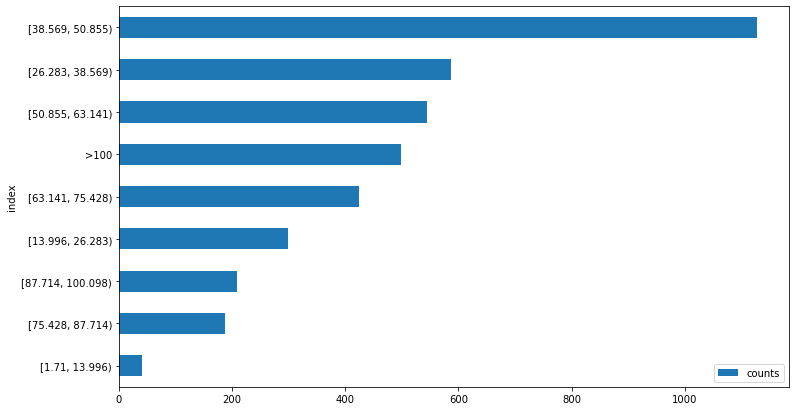

In [8]:
df.loc[df['preço']<=100,'preço_cat'] = pd.cut(df[df['preço']<=100]['preço'], bins=8, right=False)
df['preço_cat'] = df['preço_cat'].fillna('>100')
counts = df['preço_cat'].value_counts().reset_index(name="counts").sort_values(by='counts',ascending=True)
counts.plot(x='index',y='counts',kind='barh')
plt.show()

In [13]:
X = df[['Ano','Edição','Páginas']]
y = df['preço_cat']

In [32]:
y = y.to_numpy().astype(str)

In [16]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=64)

In [39]:
model = LogisticRegression(max_iter=10000)
scores = cross_val_score(model, X, y, cv=cv_outer,scoring='f1_micro',n_jobs=-1)
print(scores)
print(f'Pontuação f1 média: {scores.mean()}')

[0.33928571 0.34183673 0.32908163 0.33418367 0.34183673 0.33418367
 0.375      0.34526854 0.34782609 0.33759591]
Pontuação f1 média: 0.3426098700349705
